In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
from sklearn import metrics

horseshoes = np.genfromtxt('dataSetHorseshoes.csv',delimiter=',')


In [13]:
from sklearn.svm import SVC
from sklearn_rvm import EMRVC

def run(model,data,title, ax):
    X = data[:,1:3]
    Y = data[:,0]
    class0 = data[data[:,0]==0, :]
    class1 = data[data[:,0]==1, :]

    xx,yy = np.meshgrid(np.arange(np.min(X[:,0])-1, np.max(X[:,0])+1, 0.1),np.arange(np.min(X[:,1])-1, np.max(X[:,1])+1, 0.1))
    xygrid = np.c_[xx.ravel(), yy.ravel()]

    model.fit(X,Y)
    preds = model.predict(xygrid)
    decisionstats = model.decision_function(xygrid)
    # decisionstats = model.predict_proba(xygrid)[:,1]

    im = ax.pcolormesh(xx, yy, decisionstats.reshape(xx.shape), cmap="jet")
    # ax.colorbar(im)
    ax.scatter(class0[:,1],class0[:,2],label="class 0")
    ax.scatter(class1[:,1],class1[:,2],label="class 1")
    # if type(model) == SVC:
    #     plt.scatter(model.support_vectors_[:,0], model.support_vectors_[:,1], facecolor="none",edgecolors='white',alpha=1, label="support vector")
    #     print(model.support_vectors_.shape)

    # elif type(model) == EMRVC:
    #     plt.scatter(model.relevance_vectors_[:,0], model.relevance_vectors_[:,1], facecolor="none",edgecolors='white',alpha=1, label="support vector")
    #     print(model.relevance_vectors_.shape)
    # print(X.shape)

    ax.contour(xx, yy, preds.reshape(xx.shape), levels=[0.5], colors="white", linewidths=[2])
    ax.legend()
    ax.set_title(title)

    return im


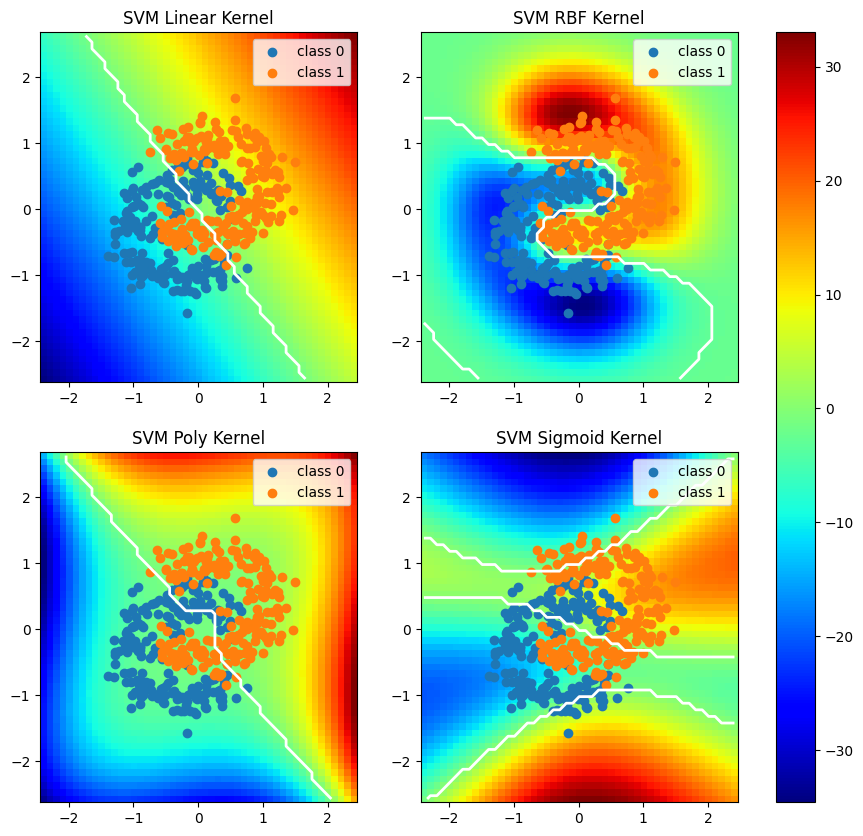

In [14]:
fig,ax = plt.subplots(2,2,figsize=(10,10))
run(SVC(kernel='linear'), horseshoes, 'SVM Linear Kernel',ax[0][0])
run(SVC(kernel='rbf'), horseshoes,  'SVM RBF Kernel',ax[0][1])
run(SVC(kernel='poly'), horseshoes, 'SVM Poly Kernel',ax[1][0])
c = run(SVC(kernel='sigmoid'), horseshoes,  'SVM Sigmoid Kernel',ax[1][1])

cbar = fig.colorbar(c, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
cbar.ax.yaxis.set_ticks_position('right')
plt.show()


# Exploring Support Vector and Relevance Vector Machines

## 1)
### 1a)

(196, 2)
(400, 2)


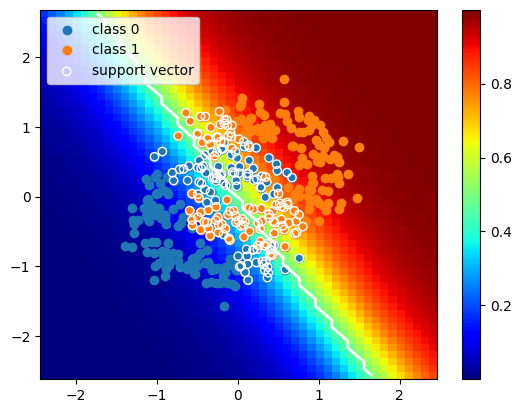

In [58]:
svm = SVC(kernel='linear',probability=True)
run(svm, horseshoes)

### 1b)
Of the 400 data points, 196 (49%) data points were support vectors. The support vectors were the data points that were closest to the decison boundary line.

### 1c)
The location and slope of the decision boundary for the linear SVM and the KNN with large K is similar. The decision boundary for KNN wasn't completely linear and at $x_1$ greater than 0.5, started to level out. In my opinion the KNN decison boundary is more trustworthy because the KNN is more tuned to fit the dataset since there are essentially 399 support vectors being used to make predictions instead of 196. However, for the amount of space efficiency that SVM provides, the SVM predictions are pretty good.


## 2)
### 2a)

(6, 2)
(400, 2)


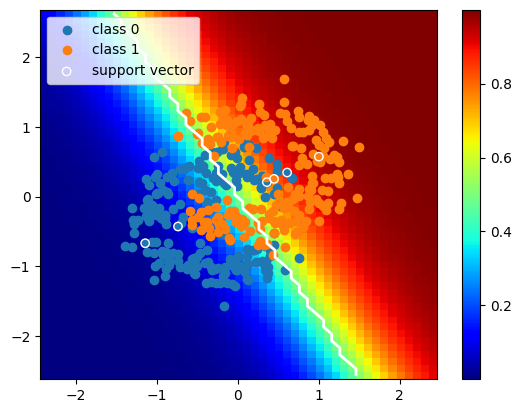

(196, 2)
(400, 2)


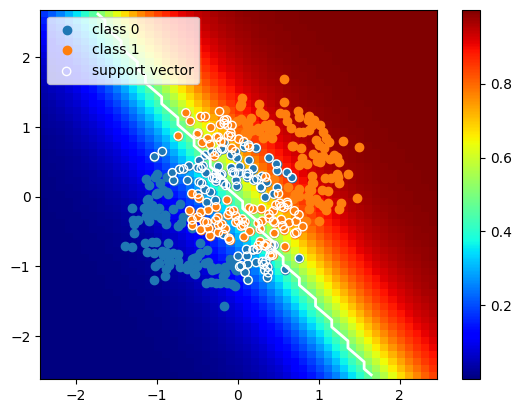

In [67]:
rvm = EMRVC(kernel="linear")
run(rvm,horseshoes)

### 2b)
The relevance vectors are located along an axis perpendicular to the decision boundary line. Only 13 out of the 400 (3.25%) data points were relevant vectors which is nearly 1/20 of the amount of vectors used in SVM. 

### 2c) 

I can't really discern any difference between the SVM and RVM decision boundaries. Thus, the location and slope of the decision boundary was very similar to the decison boundary made by a KNN with large K. The decision boundary for KNN wasn't completely linear and at $x_1$ greater than 0.5, started to level out. In my opinion the KNN decison boundary is more trustworthy because the KNN is more tuned to fit the dataset since there are essentially 399 support vectors being used to make predictions instead of 13. However, for the amount of space efficiency that RVM provides, the RVM predictions are pretty good.


## 3)

The strength of the RVM is that it's able to replicate similar results to SVM with much less support vectors, which means the model is much more space efficient. I think it also makes computations cheaper since there are less vectors being multiplied to generate the decision boundary.

The strength of the SVM is that it is faster to train. I found that the SVM model got trained almost instantly where as the RVM model took a couple of seconds. Also since the RVM keeps vectors that are in the central areas of the class blobs, data points that are farther away are likely going to be misclassified. SVM will likely handle these points better because the support vectors are located up and down the decison boundary.

## 5)
### 5a)

(145, 2)
(400, 2)


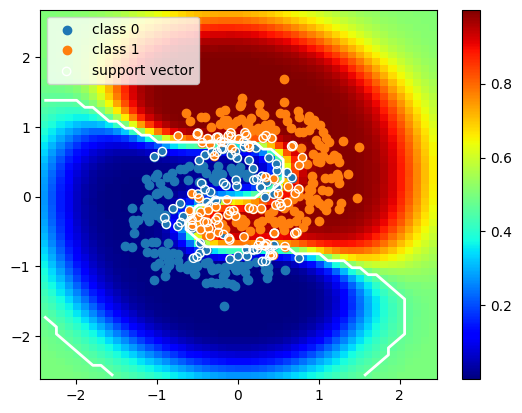

In [70]:
rbf_svm = SVC(kernel='rbf',probability=True)
run(rbf_svm, horseshoes)

### 5b)
The support vectors are located along the decision boundary. There are 145 support which is about 36.25% the total vectors. 

### 5c)
The decision static surface makes much more sense as it follows the curves of the horseshoes. Also for areas that aren't close to any data points, there is less certainty of which class the area belongs to.

### 5d)
For areas near the decision boundary the shape of the boundary produced by the SVM with RBF kernel is very similar to KNN with K=1. The SVM boundary is smoother and unlike the KNN boundary has no random disjoint parts. Here, I would trust the SVM boundary because although there are some misclassified data points(compared to KNN=1 having no misclassified data points), the boundary produced by the SVM appears to fit the data better.


## 6)
### 6a)

C:\Users\fuzzi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn_rvm\em_rvm.py:675: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  warnings.warn("The default value of gamma will change "


(7, 2)
(400, 2)


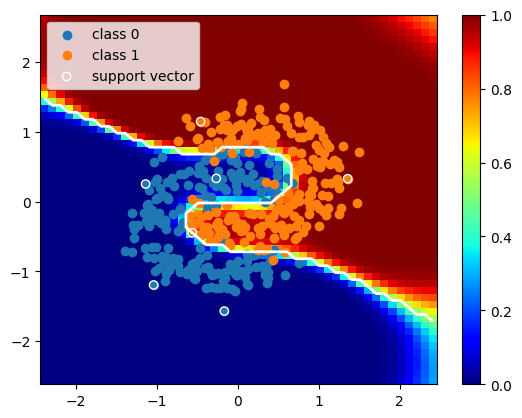

In [71]:
rbf_rvm = EMRVC(kernel='rbf')
run(rbf_rvm, horseshoes)

### 6b)
The relevance vectors are located along outer edges of the 'horseshoes' with the exception of one relevance vector being in the center of the entire data blob.  There are 7 relevance vectors which is about 1.75% the total vectors and 1/20 of the amount of support vectors in the SVM. 

### 6c)
The decision static surface makes much more sense as it follows the curves of the horseshoes. Compared to the SVM, the region for class 1 and region for class two is much larger.

### 6d)
For areas near the decision boundary the shape of the boundary produced by the RVM with RBF kernel is very similar to KNN with K=1. The RVM boundary is smoother than the SVM which was much smoother than the KNN boundar. Here, I would trust the RVM boundary because although there are some misclassified data points(compared to KNN=1 having no misclassified data points), the boundary produced by the RVM appears to fit the data better.


## 7)
The strength of the RVM is that it has much less support vectors, which means the model is much more space efficient. However, unlike the linear case, the difference in results of the rbf RVM/SVM models is greater than the difference in results of the linear RVM/SVM models. The RVM decision boundary is more biased which means that it's likely going to be more generalizable to new data, but probably be less accurate during validation. This can be seen by looking at the decision statistic surface as the bean-like shape that encompasses areas that are to be classified as class 1 and class 0 is much larger for the RVM model compared to the SVM model.

The strength of the SVM is that it is faster to train. Like the linear case, I found that the SVM model got trained almost instantly where as the RVM model took a couple of seconds. In fact, compared to the linear version, the rbf RVM model was much slower to train. 

## 8)

When choosing SVM or RVM, I think for there are _ factors to consider:
1) Training time - if the model needs to be constantly retrained, I would elect to use SVM since the training time was significantly less, and I bet this difference in training time only gets greater with more training data
2) Data Storage - if the size of the model is important (because the technology containing the model has limited memory) RVM is definitely the way to go since it saves significantly less vectors (I found it to use 1/20 of the SVM vectors)
3) Accuracy - although the difference in results was comparable, the SVM (especially for the rbf kernel) model fit the data more tightly. If false positives are undesirable, I think SVM is a better option.

## 9)

I think choosing a kernel should be based on what is known about the data via visualization. For example, if the data is known to be curvy like the horseshoe data, then an rbf kernel is much more desirable. Building on this, when choosing the kernel parameters, I think one should look at how curvy it is. If the horseshoe curves a lot, then choose a smaller parameter. 